In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [5]:
data.head(20)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


### Удалите из данных дубликаты. 
- Почему они возникли? 
1. Непарвильно сформированная БД

- Много ли их? В каких группах их больше всего?
Половина всех данных, в группе TV-14

In [6]:
dupli = data.duplicated()
#print(dupli,'\n\n\n')
print('Количество дубликатов:', len(data[dupli]),'\n\n\n')

dupli_rating = data[dupli]['rating'].value_counts()

#dupli


Количество дубликатов: 500 





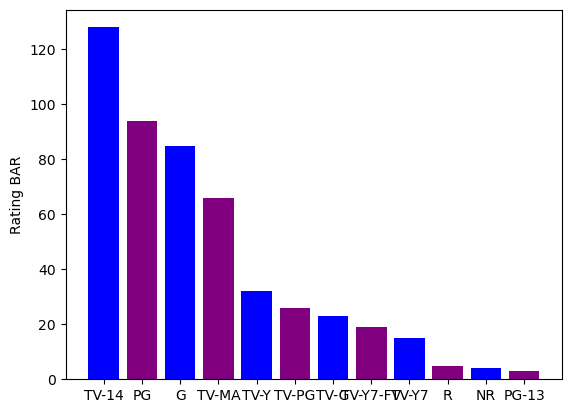

In [7]:
plt.bar(dupli_rating.index, dupli_rating, color = ['blue', 'purple'])
plt.ylabel('Rating BAR')

plt.show()

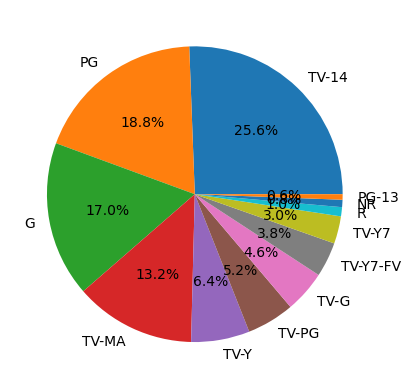

In [8]:
fig, ax = plt.subplots()
ax.pie(dupli_rating, labels=dupli_rating.index, autopct='%1.1f%%')
plt.show()

### Сколько рейтинговых групп представлено в данных?

Количество рейтинговых групп: 13


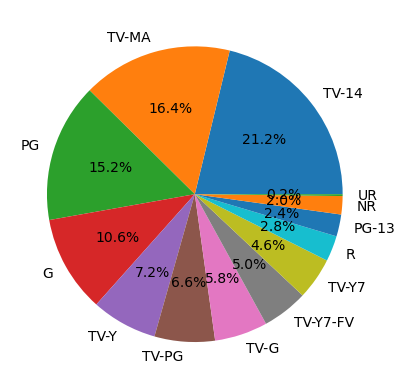

In [9]:

not_dupli = data[dupli == False]
print('Количество рейтинговых групп:', len(not_dupli['rating'].value_counts()))

not_dupli_rating = data[dupli == False]['rating'].value_counts()

plt.pie(not_dupli_rating, labels=not_dupli_rating.index, autopct='%1.1f%%')
plt.show()


In [10]:

#DF_dupli = data[dupli]
#DF_dupli.sort_values(by=['title'])


In [11]:
#not_dupli.sort_values(by=['title'])

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?
половина пользоватей предпочитает не ставить оценку. Выпускают популярное шоу видно по диагрмме, то что "заходит" людям.

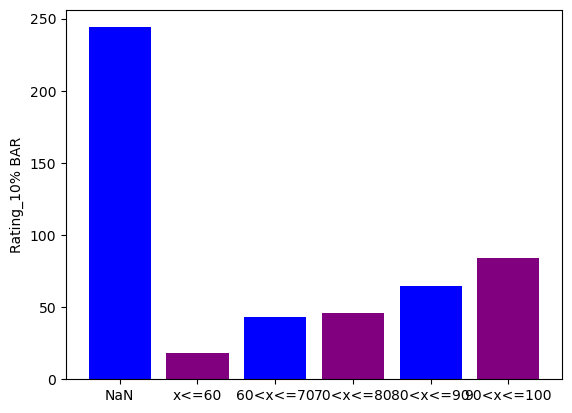

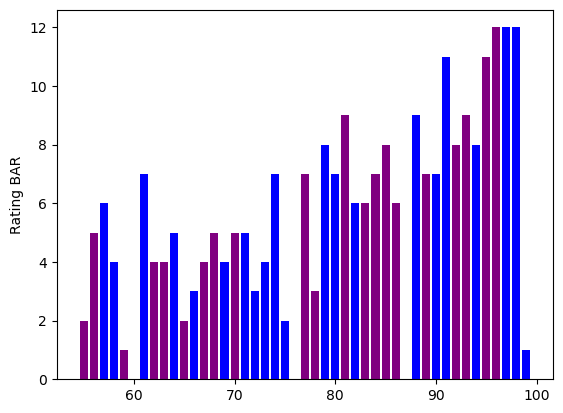

,title,rating,ratingLevel,release year,user rating score
363,White Collar,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


In [42]:
score = not_dupli['user rating score'].value_counts(dropna=False)
score1 = not_dupli['user rating score'].value_counts()
#print(score)
score_range10 = []
score_range10.append(244)
score_less60 = not_dupli[not_dupli['user rating score'] <= 60]
#print(score_less60)
score_range10.append(len(score_less60))
score_more60less70 = not_dupli.loc[(not_dupli['user rating score'] > 60) & (not_dupli['user rating score'] <= 70)]
#print(len(score_more60less70))
score_range10.append(len(score_more60less70))
score_more70less80 = not_dupli.loc[(not_dupli['user rating score'] > 70) & (not_dupli['user rating score'] <= 80)]
#print(len(score_more70less80))
score_range10.append(len(score_more70less80))
score_more80less90 = not_dupli.loc[(not_dupli['user rating score'] > 80) & (not_dupli['user rating score'] <= 90)]
#print(len(score_more80less90))
score_range10.append(len(score_more80less90))
score_more90less100 = not_dupli.loc[(not_dupli['user rating score'] > 90) & (not_dupli['user rating score'] <= 100)]
#print(len(score_more90less100))
score_range10.append(len(score_more90less100))
#print(score_range10)
spis = ['NaN', 'x<=60', '60<x<=70', '70<x<=80', '80<x<=90', '90<x<=100' ]
#---------------
plt.bar(spis, score_range10, color = ['blue', 'purple'])
plt.ylabel('Rating_10% BAR')
plt.show()
plt.bar(score1.index, score1, color = ['blue', 'purple'])
plt.ylabel('Rating BAR')
plt.show()



### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
Да, так как зависимость не линейная
- Могут ли данные характеристики значительно отличаться? Почему? 
Могут, если 

In [13]:
mean_data = data['user rating score'].mean()
median_data = data['user rating score'].median()
std_data = data['user rating score'].std()
var_data = data['user rating score'].var()
min_data = data['user rating score'].min()
max_data = data['user rating score'].max()
print('Полная БД - медина:', median_data,'среднее:', mean_data, )
print('Полная БД - стандартное отклонение:', std_data,'дисперсия', var_data)
print('Полная БД - минимум:', min_data,'максимум:', max_data )
print(data['user rating score'].describe())

mean_not_dupli = not_dupli['user rating score'].mean()
median_not_dupli = not_dupli['user rating score'].median()
print('БД без дублей - медина:', median_not_dupli,'среднее:', mean_not_dupli)
std_not_dupli = not_dupli['user rating score'].std()
var_not_dupli = not_dupli['user rating score'].var()
min_not_dupli = not_dupli['user rating score'].min()
max_not_dupli = not_dupli['user rating score'].max()
print('БД без дублей - стандартное отклонение:', std_not_dupli,'дисперсия', var_not_dupli)
print('БД без дублей - минимум:', min_not_dupli,'максимум:', max_not_dupli )
print(not_dupli['user rating score'].describe())

mean_not_dupli_Nan = not_dupli['user rating score'].mean(skipna=False)
median_not_dupli_Nan = not_dupli['user rating score'].median(skipna=False)
print('БД без дублей с учетом NaN - медина:', median_not_dupli_Nan,'среднее:', mean_not_dupli_Nan)



Полная БД - медина: 88.0 среднее: 84.09421487603306
Полная БД - стандартное отклонение: 12.344370902034541 дисперсия 152.38349296699707
Полная БД - минимум: 55.0 максимум: 99.0
count    605.000000
mean      84.094215
std       12.344371
min       55.000000
25%       75.000000
50%       88.000000
75%       95.000000
max       99.000000
Name: user rating score, dtype: float64
БД без дублей - медина: 83.5 среднее: 81.3984375
БД без дублей - стандартное отклонение: 12.730904096632221 дисперсия 162.07591911764706
БД без дублей - минимум: 55.0 максимум: 99.0
count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64
БД без дублей с учетом NaN - медина: nan среднее: nan


### В какие годы были запущены шоу, представленные в датасете?

In [14]:
year_kol = not_dupli['release year'].value_counts().sort_index()
year = list(not_dupli['release year'].value_counts().sort_index().index)

print(*year)
#year_kol.describe()

1940 1976 1978 1982 1986 1987 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
Наблюдаетя рост с 1997 по 2016. В 2017 идет регрессия.
- Есть ли выбросы? 
Да. для всего DF выбросы 2015 - 2017 год
Если рассматреть данные с 1997 года(скачок в телеиндустрии, телевизоры перестали быть элемнтом роскоши), то 2017 год выбросом не является.
- Что из себя представляют выбросы?
В эти года было запущено больше всего шоу. Выбрасывать их это преступление.
- Чем могут быть они вызваны?
Спрос рождает предложение. Развитем телевиденья, отсутвия альтернатив, удобство для людей, может ошибка DF. Данная база данных не дает возможности ответить на вопрос однозначно. Но видна положительная тендеция к выпускам новых шоу до 2016 года 

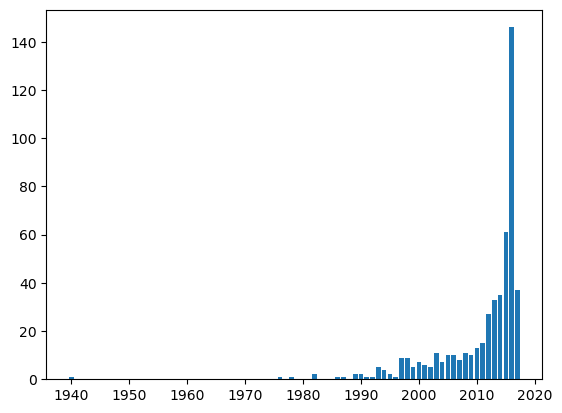

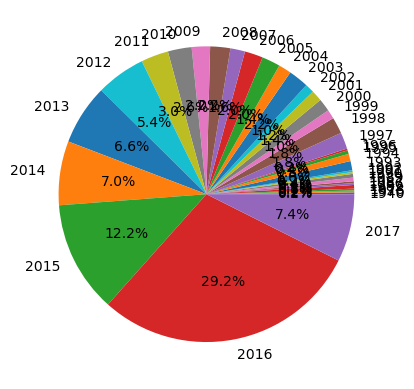

Выбросы всего DF: 2015 2016 2017 year


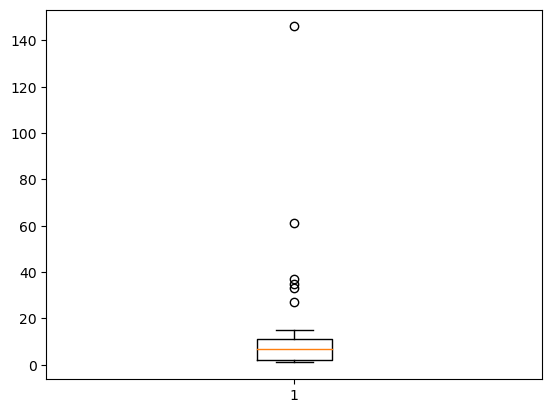

Выбросы срез с 1997  DF: 2015 2016


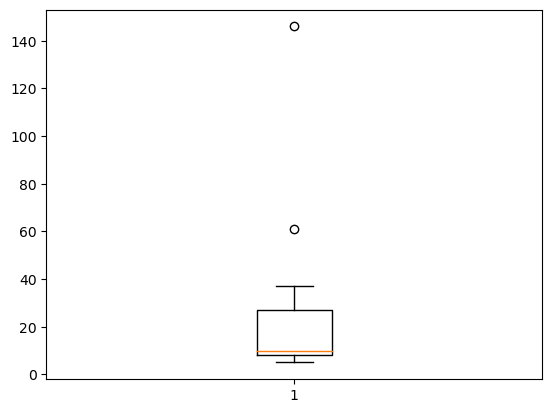

In [15]:
plt.bar( year_kol.index, year_kol)
plt.show()


plt.pie(year_kol, labels=year_kol.index, autopct='%1.1f%%')
plt.show()

year_kol_sr = year_kol.iloc[-21:]
vibros = list(year_kol[year_kol > year_kol.quantile(q=0.925)].index)
print('Выбросы всего DF:',*vibros, 'year')
#Весь датафрейм
fig, ax = plt.subplots()
ax.boxplot(year_kol)
plt.show()
vibros_srez = list(year_kol_sr[year_kol_sr > year_kol_sr.quantile(q=0.925)].index)
print('Выбросы срез с 1997  DF:', *vibros_srez)
#Срез за посление 10 лет в DF
fig, ax = plt.subplots()
ax.boxplot(year_kol.iloc[-21:])
plt.show()





#print(year_kol > year_kol.quantile(q=0.925))
#print(year_kol.iloc[-21:] > year_kol.iloc[-21:].quantile(q=0.925))
#year_kol.iloc[-21:]

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
No. Так как количество шоу очень разняться (почти в четыре раза). 
- Как еще можно оценить "Успешность"? 
По качеству выпущенных фильмов, найти фильмы выше определенного рейтинга и посмотреть на отношение ко всему.




In [16]:
data_2016 = not_dupli[not_dupli['release year'] == 2016]

data_2017 = not_dupli[not_dupli['release year'] == 2017]
print(29.2/7.4)
print('Средняя оценка за 2016:', data_2016['user rating score'].mean(), 'больше средней оценки за 2017:',
      data_2017['user rating score'].mean())

3.9459459459459456
Средняя оценка за 2016: 84.31395348837209 больше средней оценки за 2017: 88.125


### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

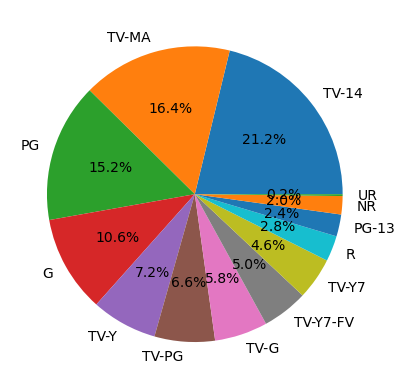

In [17]:
plt.pie(not_dupli_rating, labels=not_dupli_rating.index, autopct='%1.1f%%')
plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

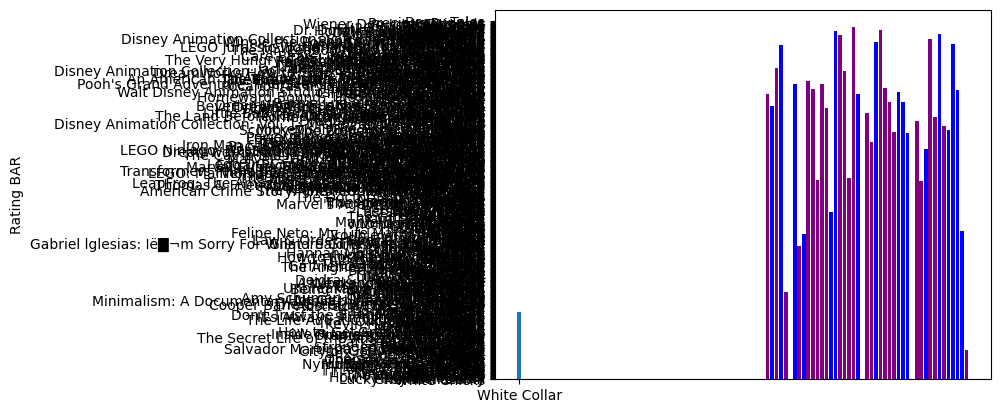

,title,rating,ratingLevel,release year,user rating score
363,White Collar,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


In [54]:
plt.bar(not_dupli['user rating score'], not_dupli['title'], color = ['blue', 'purple'])
plt.bar('White Collar', 93)
plt.ylabel('Rating BAR')
plt.show()

#plt.show()
not_dupli[not_dupli['title'] == 'White Collar']